In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import h5py
from animateSwarm import AnimateTools as at
from TsTools import general as gen
from pathlib import Path
import pickle
from functools import partial
%reload_ext autoreload
%autoreload 2

/usr/local/lib/python3.5/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


# Definitions

In [2]:
def pavas2colors(pavas):
    if np.std(pavas) > 1e-5:
        colors = np.squeeze(pavas)
        colors -= colors.min()
        colors /= colors.max()
    else:
        colors = 'k'
    return colors

In [3]:
tail_length = 2 # 3
mode = 'normal' # 'normal', 'pictures', 'movie', 'gif'
fps = 15
dpi = 200
NsamShow = 4
sizePrey = 1/8
sizePred = sizePrey * 2
name = 'Animation'
cmap = plt.get_cmap('coolwarm') # alternatives 'bwr', 'Reds'
folder = Path.cwd().parent

# Load data 

In [4]:
######## load data ###################
with h5py.File(str(folder / 'data' / 'out_xx.h5')) as fh5:
    preys = at.datCollector( np.array(fh5['/part']) )
    preds = at.datCollector( np.array(fh5['/pred']) )
    preysD = at.datCollector( np.array(fh5['/partD']) )
    predsD = at.datCollector( np.array(fh5['/predD']) )
pava_in_name = folder / 'pava_in_xx.in'
if pava_in_name.exists():
    pavas = np.loadtxt(str(pava_in_name))
    colors = pavas2colors(pavas)
# comment line below for colors representing alignment strength
colors = 'k'
# get info from files
time, N, _ = preys.pos.shape 
timePred, Npred, _ = preds.pos.shape
t0pred = time - timePred # predator can appear later

# Animation 

In [5]:
%matplotlib notebook

## Minimal Example 

<IPython.core.display.Javascript object>


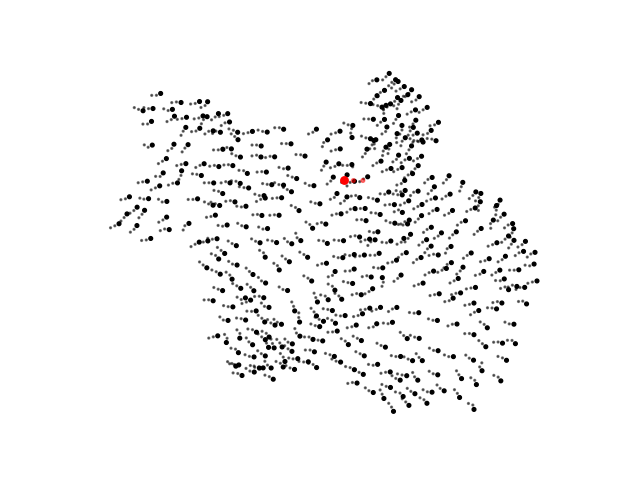

In [6]:
f, ax = plt.subplots(1)
ax.axis('off')
ax.set_aspect('equal')
# Collect update-tasks
tasks = at.taskCollector()
positions = [preys.pos, preds.pos]
tasks.append( at.Limits4Pos(positions, ax) )
tasks.append( at.headAndTail(preys, sizePrey, colors, ax,
                             tail_length, cmap=cmap) )
tasks.append( at.headAndTail(preds, sizePred, 'r',
                             ax, tail_length, cmap=cmap,
                             delay=t0pred) )
# animation
interval = 1000*(1/fps) # interval in ms
anim = animation.FuncAnimation(f, tasks.update, interval=interval,
                               frames=range(0-1, time), repeat=True)
plt.show()

## Extended Version

<IPython.core.display.Javascript object>


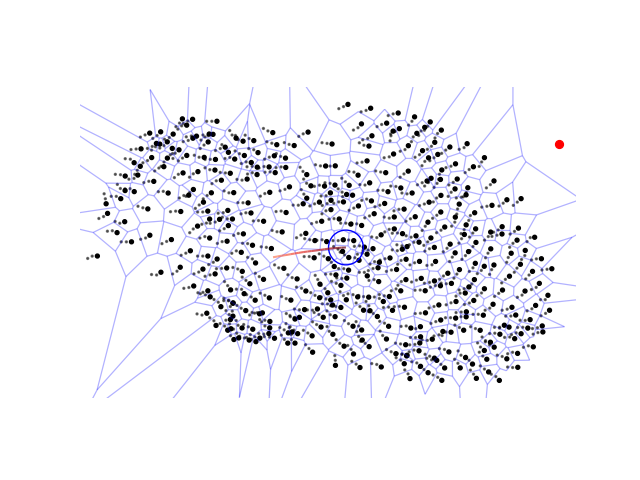

In [7]:
f, ax = plt.subplots(1)
ax.axis('off')
ax.set_aspect('equal')
# Collect update-tasks
tasks = at.taskCollector()
positions = [preys.pos, preds.pos]
tasks.append( at.Limits4Pos(positions, ax) )
tasks.append( at.headAndTail(preys, sizePrey, colors, ax,
                             tail_length, cmap=cmap) )
tasks.append( at.headAndTail(preds, sizePred, 'r', ax, tail_length, 
                             delay=t0pred) )
# here are the extensions
# tasks.append( at.voro_lines(preys, ax) )
tasks.append( at.voro_lines(preys, ax, preds, t0pred) )
tasks.append( at.lineFadingCOM(preys.pos, ax, 30) )
tasks.append( at.circleCOM(preys.pos, 1, 'b', ax) )
# animation
interval = 1000*(1/fps) # interval in ms
anim = animation.FuncAnimation(f, tasks.update, interval=interval,
                               frames=range(0-1, time), repeat=True)
plt.show()

## Advanced Example 

<IPython.core.display.Javascript object>


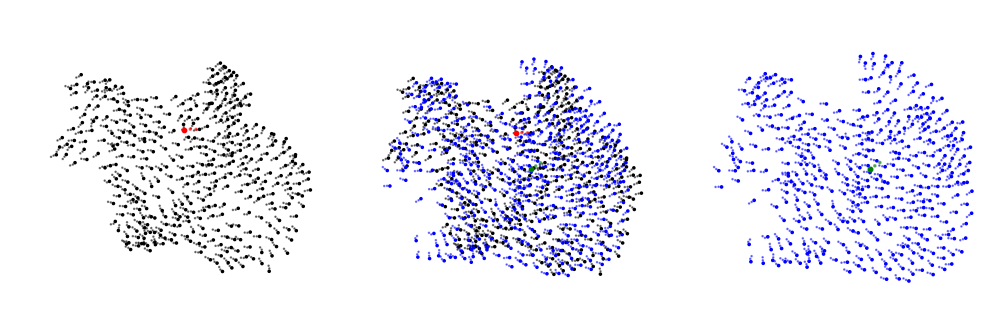

In [8]:
# create figure:
rows = 1 
cols = 3
f, axs = plt.subplots(rows, cols,
                      figsize=0.7*min(rows, cols)*plt.figaspect(rows/cols))
f.tight_layout(rect=[0, 0, 1, 0.95]) # rect=[left, bottom, right, top]

# partial definition to not repeat arguments (missing: ax, tail-length)
preyHeads = partial(at.headAndTail, preys, sizePrey, colors, cmap=cmap)
predHeads = partial(at.headAndTail, preds, sizePred, 'r',
                    delay=t0pred)
preyHeadsD = partial(at.headAndTail, preysD, sizePrey, 'b', delay=t0pred)
predHeadsD = partial(at.headAndTail, predsD, sizePred, 'g',
                     delay=t0pred)
# Collect update-tasks
tasks = at.taskCollector()
ax = axs[0] # only prey
positions = [preys.pos, preds.pos]
tasks.append( at.Limits4Pos(positions, ax) )
tasks.append( preyHeads(ax, tail_length) )
tasks.append( predHeads(ax, tail_length) )
ax = axs[1] # both prey and dummies
positions += [preysD.pos, predsD.pos]
tasks.append( at.Limits4Pos(positions, ax) )
tasks.append( preyHeads(ax, tail_length) )
tasks.append( predHeads(ax, tail_length) )
tasks.append( preyHeadsD(ax, tail_length) )
tasks.append( predHeadsD(ax, tail_length) )
ax = axs[2] # both prey and dummies
positions = [preysD.pos, predsD.pos]
tasks.append( at.Limits4Pos(positions, ax, delay=t0pred) )
tasks.append( preyHeadsD(ax, tail_length) )
tasks.append( predHeadsD(ax, tail_length) )
for ax in axs:
    ax.axis('off')
    ax.set_aspect('equal')
interval = 1000*(1/fps) # interval in ms
anim = animation.FuncAnimation(f, tasks.update, interval=interval,
                               frames=range(0-1, time), repeat=True)
plt.show()

###  Dynamic changing colors
* in this example the color means nothing (random)

In [9]:
# random colors of the prey
colors = np.random.standard_normal((time, N))
colors -= colors.min()
colors /= colors.max()
# random colors of the predator
pcolors = np.random.standard_normal((time, 1))
pcolors -= pcolors.min()
pcolors /= pcolors.max()

<IPython.core.display.Javascript object>


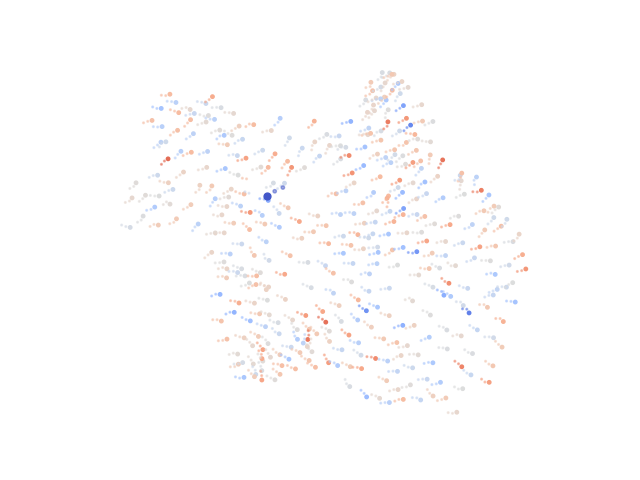

In [10]:
# it is the same as the minimal example
f, ax = plt.subplots(1)
ax.axis('off')
ax.set_aspect('equal')
# Collect update-tasks
tasks = at.taskCollector()
positions = [preys.pos, preds.pos]
tasks.append( at.Limits4Pos(positions, ax) )
tasks.append( at.headAndTail(preys, sizePrey, colors, ax,
                             tail_length, cmap=cmap) )
tasks.append( at.headAndTail(preds, sizePred, pcolors,
                             ax, tail_length, cmap=cmap,
                             delay=t0pred) )
# animation
interval = 1000*(1/fps) # interval in ms
anim = animation.FuncAnimation(f, tasks.update, interval=interval,
                               frames=range(0-1, time), repeat=True)
plt.show()